In [1]:
import supereeg as se
import pandas as pd
import numpy as np
import os
import hypertools as hyp
import plot as plot
from scipy import stats
import matplotlib
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import plotting as ni_plt

In [2]:
fig_dir = '/Users/lucyowen/repos/supereeg_paper/paper_figs/supplemental_2'

In [3]:
fig_count = 0

# PyFR analysis

In [69]:
pyfr_across = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/pyfr/pyfr_across.csv', index_col=0)
pyfr_within = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/pyfr/pyfr_within.csv', index_col=0)

## Merge dataframes

In [102]:
pyFR_df = pd.merge(pyfr_across, pyfr_within, on=['Subject', 'R'])
pyFR_df.dropna(inplace=True)
pyFR_df.rename(columns={"Correlation_x":"Correlation_Across", "Correlation_y":"Correlation_Within"}, inplace=True)
e_corrs = pd.DataFrame()
e_corrs['across'] = pyFR_df['Correlation_Across']
e_corrs['within'] = pyFR_df['Correlation_Within']
e_corrs['Subject'] = pyFR_df['Subject']
e_corrs['R'] = pyFR_df['R']
e_corrs['Sample rate'] = pyFR_df['Sample rate']
e_corrs['Samples'] = pyFR_df['Samples']
e_corrs['Thresholded Electrodes'] = pyFR_df['Total Electrodes']
e_corrs['Sessions'] = pyFR_df['Sessions']
e_corrs['Number thresholded'] = pyFR_df['Number thresholded']

In [103]:
e_corrs['Total Time (hrs)'] = np.round(e_corrs['Samples']/e_corrs['Sample rate']/3600,3)

e_corrs['Average Session Length (hrs)'] = np.round(e_corrs['Total Time (hrs)']/e_corrs['Sessions'],3)

e_corrs['Average Session Length (hrs)'].head()

e_corrs['Total Electrodes'] = e_corrs['Thresholded Electrodes'] + e_corrs['Number thresholded']

e_corrs['Proportion Thresholded'] = np.round(e_corrs['Number thresholded'] / e_corrs['Total Electrodes'], 3)

In [104]:
e_corrs

,across,within,Subject,R,Sample rate,Samples,Thresholded Electrodes,Sessions,Number thresholded,Total Time (hrs),Average Session Length (hrs),Total Electrodes,Proportion Thresholded
0,0.845001,0.640388,FR190,[-63.64 -21.93 5.37],1024.0,14192640,10,7.0,42,3.850,0.550,52,0.808
1,0.861388,0.640299,CH013,[-48.48 38.4 17.26],256.0,1586419,121,2.0,2,1.721,0.860,123,0.016
2,0.665373,0.519872,CH048,[ 49.49 -34.7 35.17],256.0,2512896,44,4.0,79,2.727,0.682,123,0.642
3,0.640677,0.445660,TJ019,[ 65.66 -67.29 25.83],1000.0,14400000,82,2.0,16,4.000,2.000,98,0.163
4,0.764366,0.504311,FR050,[-36.36 -1.81 59.76],256.0,458496,98,1.0,2,0.498,0.498,100,0.020
5,0.329248,0.505832,FR280,[-67.68 -2.73 -8.5 ],256.0,1305603,68,3.0,14,1.417,0.472,82,0.171
6,0.531445,0.201157,TJ018,[ 29.29 -12.3 -25.74],500.0,5400000,123,1.0,37,3.000,3.000,160,0.231
7,0.589715,0.158157,CH067,[-49.49 34.96 -20.63],256.0,1322752,77,2.0,7,1.435,0.718,84,0.083
8,0.799987,0.472594,FR029,[ 44.44 -19.36 59.92],512.0,527360,58,1.0,27,0.286,0.286,85,0.318
9,0.440384,0.404822,FR190,[-65.66 -33.98 -1.79],1024.0,14192640,10,7.0,42,3.850,0.550,52,0.808


In [107]:
grouped_results_e_corrs = e_corrs.groupby('Subject')['within', 'across', 'Sample rate', 'Samples', 
                                                  'Sessions', 'Number thresholded', 'Total Time (hrs)', 'Average Session Length (hrs)', 
                                                  'Total Electrodes', 'Proportion Thresholded'].mean()

In [119]:
grouped_results_e_corrs['Subject'] = range(grouped_results_e_corrs.shape[0])

In [123]:
subj_dict = grouped_results_e_corrs['Subject'].to_dict()

In [124]:
e_corrs.Subject = [subj_dict[item] for item in e_corrs.Subject] 

In [125]:
e_corrs

,across,within,Subject,R,Sample rate,Samples,Thresholded Electrodes,Sessions,Number thresholded,Total Time (hrs),Average Session Length (hrs),Total Electrodes,Proportion Thresholded
0,0.845001,0.640388,31,[-63.64 -21.93 5.37],1024.0,14192640,10,7.0,42,3.850,0.550,52,0.808
1,0.861388,0.640299,8,[-48.48 38.4 17.26],256.0,1586419,121,2.0,2,1.721,0.860,123,0.016
2,0.665373,0.519872,13,[ 49.49 -34.7 35.17],256.0,2512896,44,4.0,79,2.727,0.682,123,0.642
3,0.640677,0.445660,52,[ 65.66 -67.29 25.83],1000.0,14400000,82,2.0,16,4.000,2.000,98,0.163
4,0.764366,0.504311,25,[-36.36 -1.81 59.76],256.0,458496,98,1.0,2,0.498,0.498,100,0.020
5,0.329248,0.505832,38,[-67.68 -2.73 -8.5 ],256.0,1305603,68,3.0,14,1.417,0.472,82,0.171
6,0.531445,0.201157,49,[ 29.29 -12.3 -25.74],500.0,5400000,123,1.0,37,3.000,3.000,160,0.231
7,0.589715,0.158157,18,[-49.49 34.96 -20.63],256.0,1322752,77,2.0,7,1.435,0.718,84,0.083
8,0.799987,0.472594,21,[ 44.44 -19.36 59.92],512.0,527360,58,1.0,27,0.286,0.286,85,0.318
9,0.440384,0.404822,31,[-65.66 -33.98 -1.79],1024.0,14192640,10,7.0,42,3.850,0.550,52,0.808


In [126]:
e_corrs.to_csv('/Users/lucyowen/repos/supereeg_paper/data/pyfr/pyfr.csv')

In [127]:
pyfr = pd.read_csv('/Users/lucyowen/repos/supereeg_paper/data/pyfr/pyfr.csv', index_col=0)

In [128]:
grouped_results_pyfr = pyfr.groupby('Subject')['within', 'across', 'Sample rate', 'Samples', 
                                                  'Sessions', 'Number thresholded', 'Total Time (hrs)', 'Average Session Length (hrs)', 
                                                  'Total Electrodes', 'Proportion Thresholded'].mean()

In [129]:
grouped_results_pyfr.head()

,within,across,Sample rate,Samples,Sessions,Number thresholded,Total Time (hrs),Average Session Length (hrs),Total Electrodes,Proportion Thresholded
Subject,,,,,,,,,,
0,0.212669,0.604612,200.000,672600,2.0,10,0.934,0.467,64,0.156
1,0.440391,0.678015,499.907,2280995,1.0,12,1.267,1.267,40,0.300
2,0.423440,0.666542,250.000,1358998,2.0,53,1.510,0.755,96,0.552
3,0.313895,0.527050,250.000,2999442,2.0,5,3.333,1.666,16,0.312
4,0.386223,0.552401,256.000,2486697,3.0,4,2.698,0.899,64,0.062


In [130]:
def plot_corr_hist(dataframe, X, title=None, outfile=None):
    mpl.rcParams['axes.facecolor'] = 'white'
    df_corrs = pd.DataFrame()
    df_corrs[X] = dataframe[X].values
    n_count = len(df_corrs)
    bin_values = np.arange(start=-1, stop=1, step=.025)
    ax = df_corrs.plot(kind='hist', bins=bin_values, color='k', title = title, legend = False)
    vals = ax.get_yticks()
    ax.set_yticklabels([np.round(x/n_count,3) for x in vals])
    ax.set_ylabel('Proportion of electrodes')
    ax.set_xlabel(X)
    ax.set_xlim(-1, 1)
    plt.text(1,10, 'mean = '+ str(np.round(plot.z2r(plot.r2z(dataframe[X]).mean()),3)))

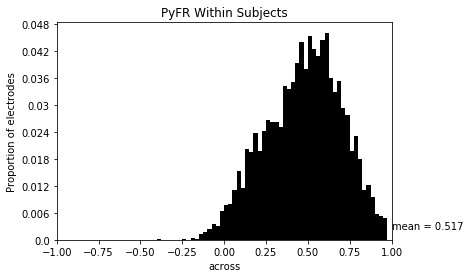

In [131]:
plot.plot_corr_hist(pyfr, X='across', title='PyFR Within Subjects' )

In [13]:
def plot_hist_by_patient(dataframe, X, bins=20, title=None, outfile=None):
    mpl.rcParams['axes.facecolor'] = 'white'
    df = pd.DataFrame()
    df[X] = dataframe[X].values
    n_count = len(df)
    #bin_values = np.arange(start=df[X].min(), stop=df[X].max())
    ax = df.plot(kind='hist',histtype='stepfilled', bins=bins, color='k', title = X, legend = False)
    ax.set_ylabel('# Patients')
    ax.set_xlabel(X)
    #ax.set_xlim(df[X].min(), df[X].max())
    print('mean: ' + str(np.round(df[X].mean(),3)))

mean: 2.475


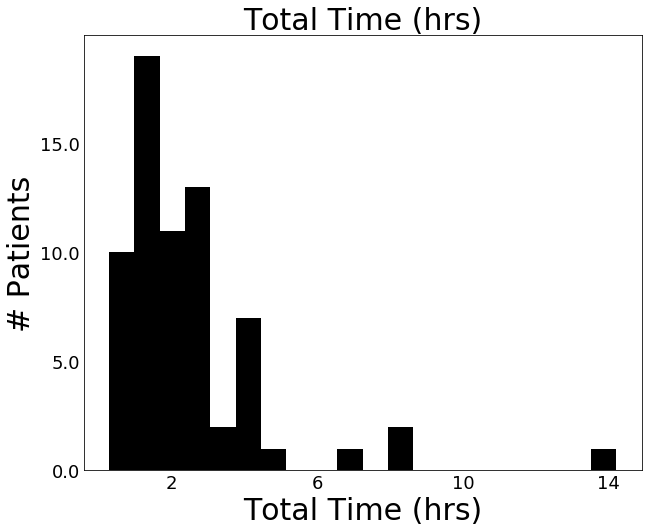

In [14]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_pyfr, 'Total Time (hrs)', title=None, outfile=outfile)

mean: 2.687


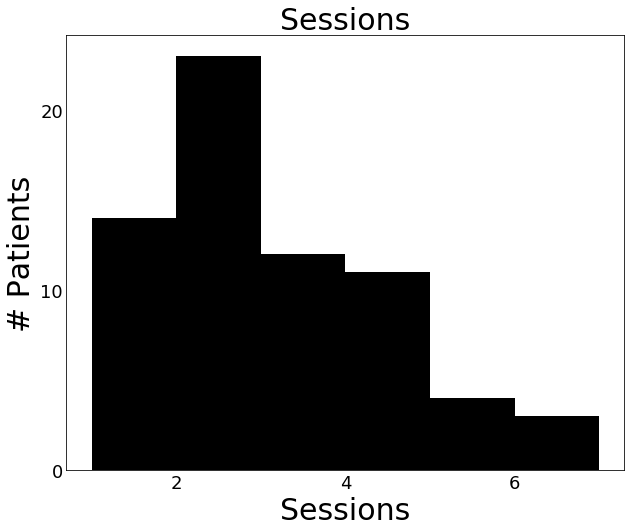

In [15]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_pyfr, 'Sessions', bins=6, title=None, outfile=outfile)

mean: 0.934


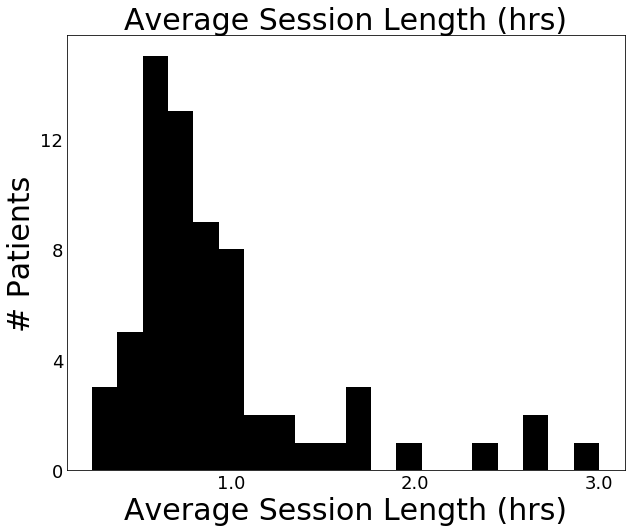

In [16]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_pyfr, 'Average Session Length (hrs)', title=None, outfile=outfile)

mean: 512.655


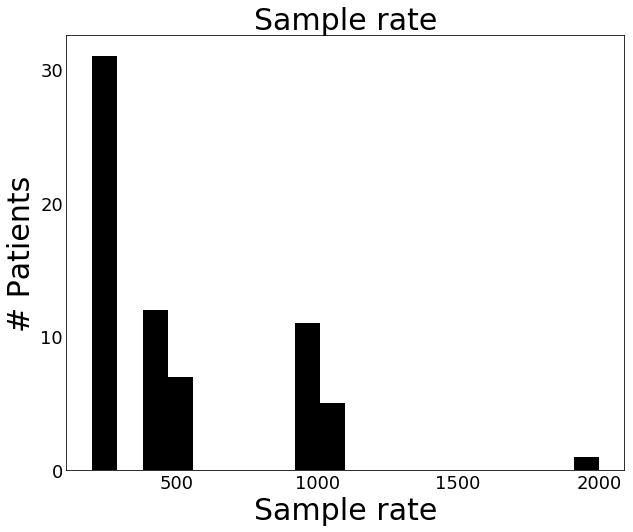

In [17]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_pyfr, 'Sample rate',  title=None, outfile=outfile)

mean: 0.278


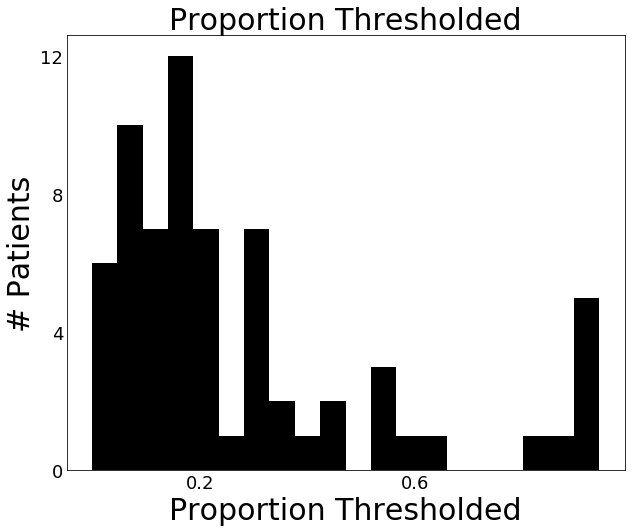

In [18]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_pyfr, 'Proportion Thresholded',title=None, outfile=outfile)

mean: 84.03


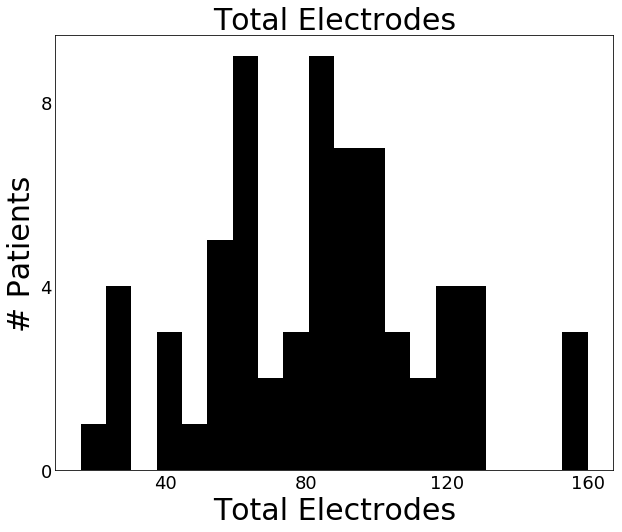

In [19]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_pyfr, 'Total Electrodes', title=None, outfile=outfile)

mean: 21.776


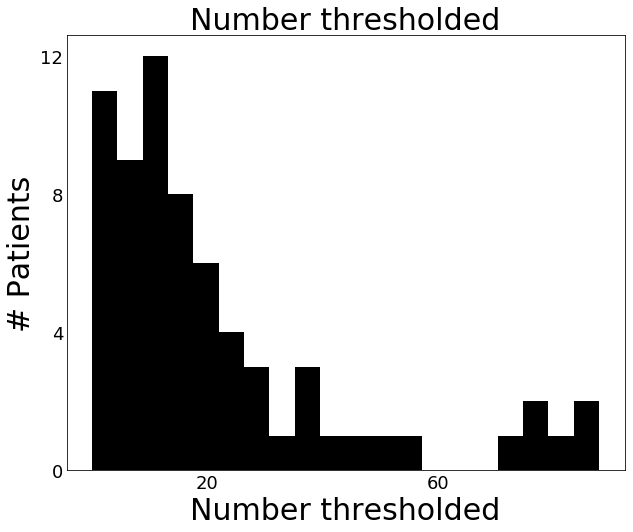

In [20]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_pyfr, 'Number thresholded', title=None, outfile=outfile)

(-0.1427141066279993, 2.0772851617768808e-20)


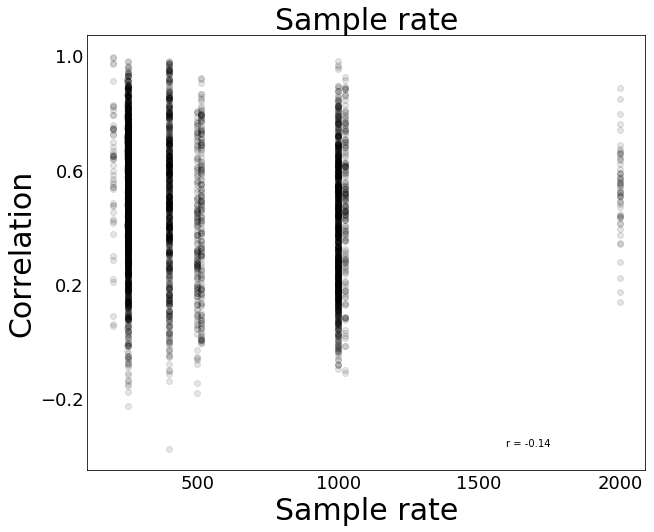

In [21]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_column(e_corrs,'Sample rate', 'across', title='Sample rate', outfile=outfile)

(0.04879852546359827, 0.0016250777036625032)


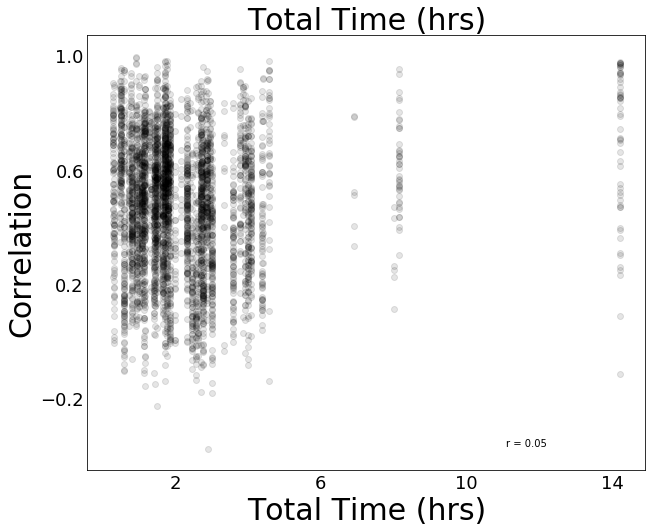

In [22]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_column(e_corrs, 'Total Time (hrs)','across',  title='Total Time (hrs)', outfile=outfile)

(0.031683382230068634, 0.040817343901643106)


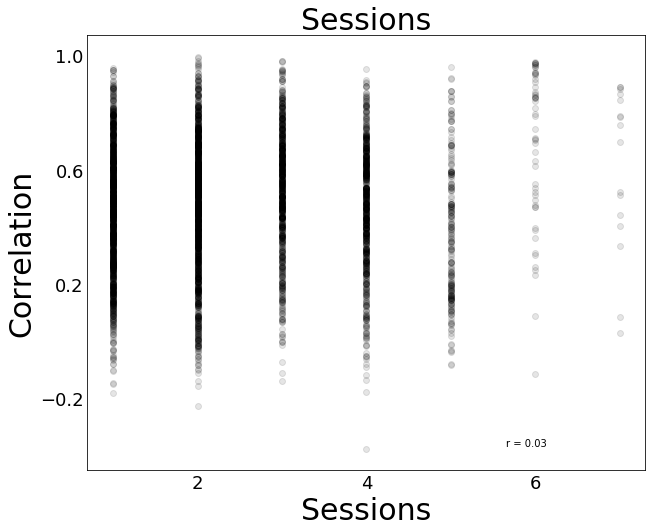

In [23]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_column(e_corrs, 'Sessions', 'across', title='Sessions', outfile=outfile)

(0.08598406840309224, 2.7013142176912023e-08)


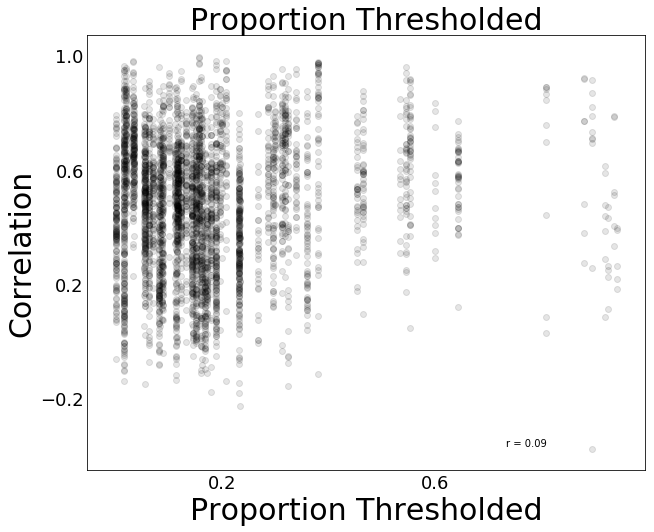

In [24]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_column(e_corrs, 'Proportion Thresholded', 'across', title='Proportion Thresholded', outfile=outfile)

(-0.17276465689020942, 2.7472176128841817e-29)


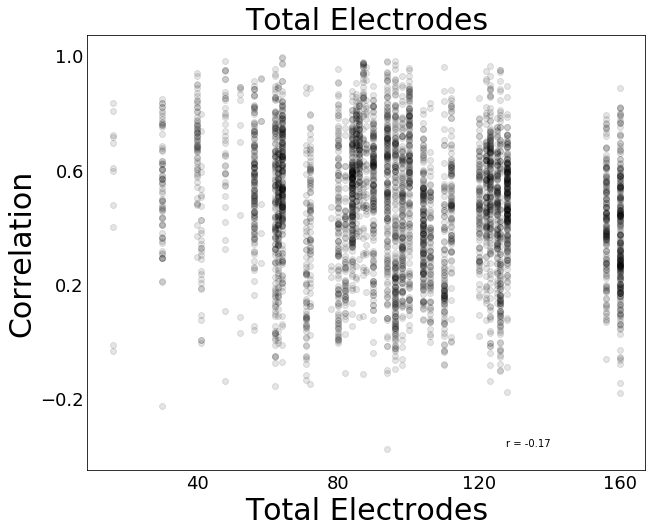

In [25]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_column(e_corrs, 'Total Electrodes', 'across', title='Total Electrodes', outfile=outfile)

(0.014377560113036238, 0.35341507030672337)


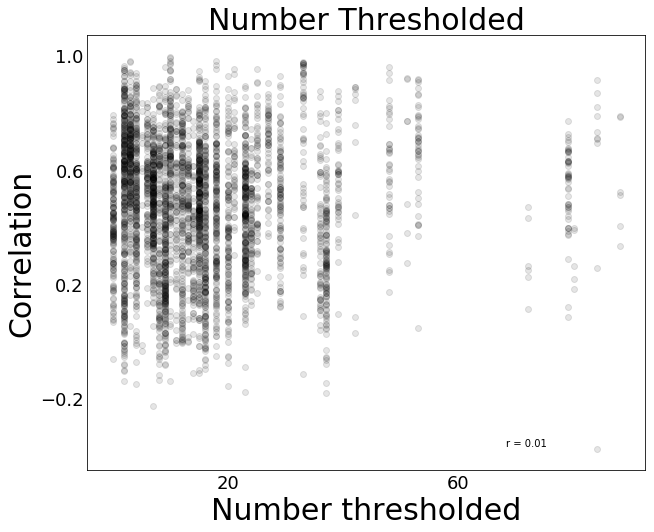

In [26]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_column(e_corrs,'Number thresholded', 'across', title='Number Thresholded', outfile=outfile)

# RAM

In [27]:
W_a_a = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/all/a_sub-a_exp.csv', index_col=0)
W_a_a.name = 'W_a_a'
W_a_all = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/all/a_sub-all_exp.csv', index_col=0)
W_a_all.name = 'W_a_all'
W_a_w = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/all/a_sub-w_exp.csv', index_col=0)
W_a_w.name = 'W_a_w'
W_w_a = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/all/w_sub-a_exp.csv', index_col=0)
W_w_a.name = 'W_w_a'
W_w_all = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/all/w_sub-all_exp.csv', index_col=0)
W_w_all.name = 'W_w_all'
W_w_w = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/all/w_sub-w_exp.csv', index_col=0)
W_w_w.name = 'W_w_w'

In [28]:
dfs = [W_a_a, W_a_all, W_a_w, W_w_a, W_w_all, W_w_w]

In [29]:
RAM_df = dfs[0]
RAM_df = RAM_df.rename(columns={"Correlation":RAM_df.name})
for df_ in dfs[1:]:
    RAM_df = RAM_df.merge(df_, on=['Subject', 'R', 'Electrode', 'Samples', 'Total Electrodes','Sample rate','Sessions', 'Number thresholded'])
    
    RAM_df = RAM_df.rename(columns={"Correlation":df_.name})

In [30]:
RAM_df.dropna(inplace=True)

In [31]:
RAM_df['Sessions'] = RAM_df['Sessions'] + 1

In [32]:
RAM_df['Thresholded Electrodes'] = RAM_df['Total Electrodes']

In [33]:
RAM_df['Total Time (hrs)'] = np.round(RAM_df['Samples']/RAM_df['Sample rate']/3600,3)

RAM_df['Average Session Length (hrs)'] = np.round(RAM_df['Total Time (hrs)']/RAM_df['Sessions'],3)

RAM_df['Average Session Length (hrs)'].head()

RAM_df['Total Electrodes'] = RAM_df['Thresholded Electrodes'] + RAM_df['Number thresholded']

RAM_df['Proportion Thresholded'] = np.round(RAM_df['Number thresholded'] / RAM_df['Total Electrodes'], 3)

In [94]:
all_subject_e = np.array([])
all_exp_e = np.array([])
for i , item in enumerate(RAM_df['Subject'].values):
    #print(item.split('_')[0])
    all_subject_e = np.append(all_subject_e, item.split('_')[0])
    all_exp_e = np.append(all_exp_e, item.split('_')[1]+ '_' + item.split('_')[2])

In [100]:
RAM_df

,R,W_a_a,Subject,Electrode,Sample rate,Samples,Total Electrodes,Sessions,Number thresholded,W_a_all,W_a_w,W_w_a,W_w_all,W_w_w,Thresholded Electrodes,Total Time (hrs),Average Session Length (hrs),Proportion Thresholded,Experiment
0,[-50.39 18.22 -43.3 ],0.242494,R1083J,2,250.0,588250,86,1.0,14,0.300987,0.447637,-0.162586,0.236228,0.061755,72,0.654,0.654,0.163,RAM_CatFR1
1,[-46.17 18.21 -42.23],0.177056,R1083J,1,250.0,588250,86,1.0,14,0.046046,0.478972,0.165845,0.275166,0.292074,72,0.654,0.654,0.163,RAM_CatFR1
2,[-57.19 19.07 -44.75],0.234188,R1083J,4,250.0,588250,86,1.0,14,0.788364,0.916196,0.542039,-0.021315,0.117429,72,0.654,0.654,0.163,RAM_CatFR1
3,[-43.21 18.21 -41.49],0.336156,R1083J,0,250.0,588250,86,1.0,14,0.536711,0.796827,0.005241,-0.211179,0.046857,72,0.654,0.654,0.163,RAM_CatFR1
4,[-54.86 15.87 40.38],0.024989,R1032D,3,250.0,668750,104,1.0,19,0.426785,0.232029,0.187670,0.312530,0.378536,85,0.743,0.743,0.183,RAM_FR1
5,[-38.79 51.43 47.05],0.049455,R1032D,0,250.0,668750,104,1.0,19,0.191558,0.514627,0.113440,0.072644,0.461210,85,0.743,0.743,0.183,RAM_FR1
6,[-52.44 24.4 43.61],0.104537,R1032D,2,250.0,668750,104,1.0,19,0.294488,0.303376,0.284694,0.395410,0.345201,85,0.743,0.743,0.183,RAM_FR1
7,[-53.39 19.07 -43.78],0.135624,R1083J,3,250.0,588250,86,1.0,14,0.567127,0.097120,0.491727,0.073085,0.043775,72,0.654,0.654,0.163,RAM_CatFR1
8,[-38.79 51.43 47.05],0.234099,R1032D,0,250.0,945000,104,2.0,24,0.537998,0.637745,0.137081,0.295410,0.270472,80,1.050,0.525,0.231,RAM_CatFR1
9,[-43.98 42.16 46.89],-0.045409,R1032D,1,250.0,945000,104,2.0,24,0.647666,0.710633,0.440786,0.465773,0.319532,80,1.050,0.525,0.231,RAM_CatFR1


In [95]:
RAM_df['Subject'] = RAM_df.index

array(['R1083J', 'R1083J', 'R1083J', ..., 'R1260D', 'R1260D', 'R1260D'],
      dtype='<U32')

In [96]:
all_exp_e

array(['RAM_CatFR1', 'RAM_CatFR1', 'RAM_CatFR1', ..., 'RAM_CatFR1',
       'RAM_CatFR1', 'RAM_CatFR1'], dtype='<U32')

In [98]:
RAM_df['Subject'] = all_subject_e
RAM_df['Experiment'] = all_exp_e

In [99]:
RAM_df

,R,W_a_a,Subject,Electrode,Sample rate,Samples,Total Electrodes,Sessions,Number thresholded,W_a_all,W_a_w,W_w_a,W_w_all,W_w_w,Thresholded Electrodes,Total Time (hrs),Average Session Length (hrs),Proportion Thresholded,Experiment
0,[-50.39 18.22 -43.3 ],0.242494,R1083J,2,250.0,588250,86,1.0,14,0.300987,0.447637,-0.162586,0.236228,0.061755,72,0.654,0.654,0.163,RAM_CatFR1
1,[-46.17 18.21 -42.23],0.177056,R1083J,1,250.0,588250,86,1.0,14,0.046046,0.478972,0.165845,0.275166,0.292074,72,0.654,0.654,0.163,RAM_CatFR1
2,[-57.19 19.07 -44.75],0.234188,R1083J,4,250.0,588250,86,1.0,14,0.788364,0.916196,0.542039,-0.021315,0.117429,72,0.654,0.654,0.163,RAM_CatFR1
3,[-43.21 18.21 -41.49],0.336156,R1083J,0,250.0,588250,86,1.0,14,0.536711,0.796827,0.005241,-0.211179,0.046857,72,0.654,0.654,0.163,RAM_CatFR1
4,[-54.86 15.87 40.38],0.024989,R1032D,3,250.0,668750,104,1.0,19,0.426785,0.232029,0.187670,0.312530,0.378536,85,0.743,0.743,0.183,RAM_FR1
5,[-38.79 51.43 47.05],0.049455,R1032D,0,250.0,668750,104,1.0,19,0.191558,0.514627,0.113440,0.072644,0.461210,85,0.743,0.743,0.183,RAM_FR1
6,[-52.44 24.4 43.61],0.104537,R1032D,2,250.0,668750,104,1.0,19,0.294488,0.303376,0.284694,0.395410,0.345201,85,0.743,0.743,0.183,RAM_FR1
7,[-53.39 19.07 -43.78],0.135624,R1083J,3,250.0,588250,86,1.0,14,0.567127,0.097120,0.491727,0.073085,0.043775,72,0.654,0.654,0.163,RAM_CatFR1
8,[-38.79 51.43 47.05],0.234099,R1032D,0,250.0,945000,104,2.0,24,0.537998,0.637745,0.137081,0.295410,0.270472,80,1.050,0.525,0.231,RAM_CatFR1
9,[-43.98 42.16 46.89],-0.045409,R1032D,1,250.0,945000,104,2.0,24,0.647666,0.710633,0.440786,0.465773,0.319532,80,1.050,0.525,0.231,RAM_CatFR1


In [132]:
grouped_results_ram = RAM_df.groupby('Subject')['Experiment','W_w_w', 'W_w_a', 'W_w_all', 'W_a_w', 'W_a_a','W_a_all', 'Sample rate', 'Samples', 
                                                  'Sessions', 'Number thresholded', 'Total Time (hrs)', 'Average Session Length (hrs)', 
                                                  'Total Electrodes', 'Proportion Thresholded'].mean()

grouped_results_ram.head()

,W_w_w,W_w_a,W_w_all,W_a_w,W_a_a,W_a_all,Sample rate,Samples,Sessions,Number thresholded,Total Time (hrs),Average Session Length (hrs),Total Electrodes,Proportion Thresholded
Subject,,,,,,,,,,,,,,
R1032D,0.205828,0.189667,0.178820,0.581201,0.268767,0.594463,250.0,8.026894e+05,1.484848,21.424242,0.891848,0.637303,104.000000,0.206273
R1061T,0.084986,0.047676,0.072618,0.417310,0.319529,0.415247,250.0,1.716483e+06,2.391304,15.956522,1.907116,0.822362,120.000000,0.132971
R1075J,0.085861,0.302263,0.134493,0.713625,0.357344,0.515095,250.0,1.056302e+06,1.432039,13.961165,1.173971,0.835684,120.000000,0.116010
R1083J,0.088955,0.133387,0.136663,0.454674,0.314444,0.469922,250.0,2.596724e+06,2.495652,24.843478,2.885513,0.904522,86.000000,0.289009
R1092J,0.370288,0.249215,0.134618,0.775062,0.337294,0.582972,250.0,1.885163e+06,1.804469,33.055866,2.094525,1.495196,125.977654,0.266698


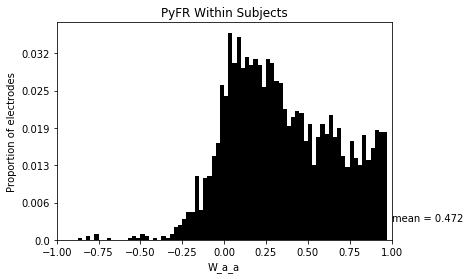

In [34]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_corr_hist(RAM_df, X='W_a_a', title='PyFR Within Subjects')

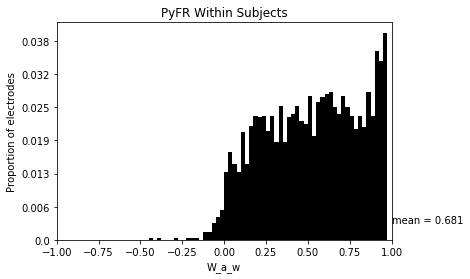

In [35]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_corr_hist(RAM_df, X='W_a_w', title='PyFR Within Subjects')

(-0.13852133263607203, 5.272488379091171e-15)


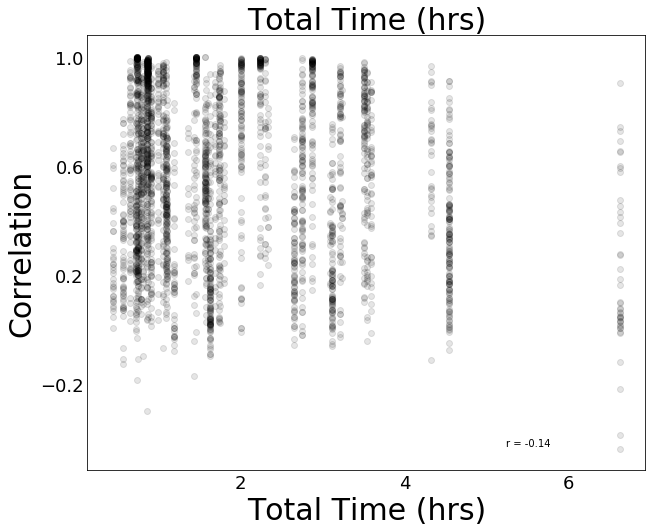

In [36]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_column(RAM_df,'Total Time (hrs)', 'W_a_w',  title='Total Time (hrs)', outfile=outfile)

(-0.14441648836593518, 3.4485897675167894e-16)


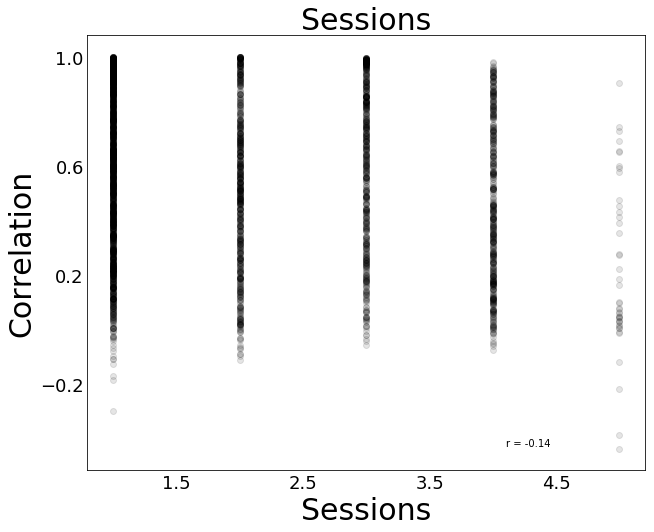

In [37]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_column(RAM_df, 'Sessions', 'W_a_w', title='Sessions', outfile=outfile)

(-0.08636843225960579, 1.1649891131056443e-06)


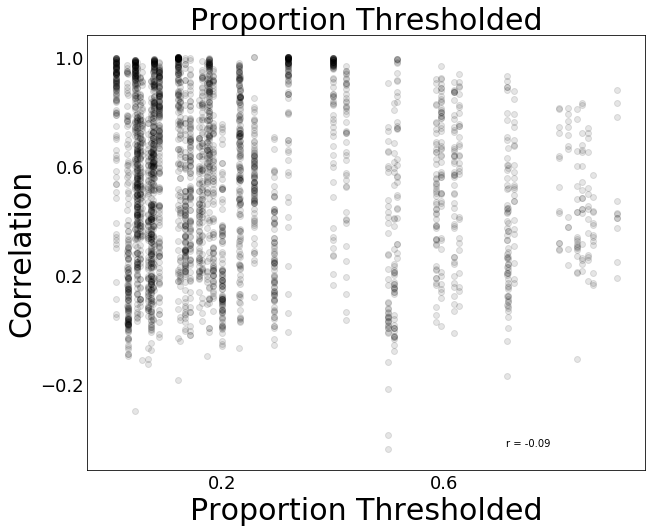

In [38]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_column(RAM_df, 'Proportion Thresholded', 'W_a_w', title='Proportion Thresholded', outfile=outfile)

(-0.040163681310167204, 0.023982067583539896)


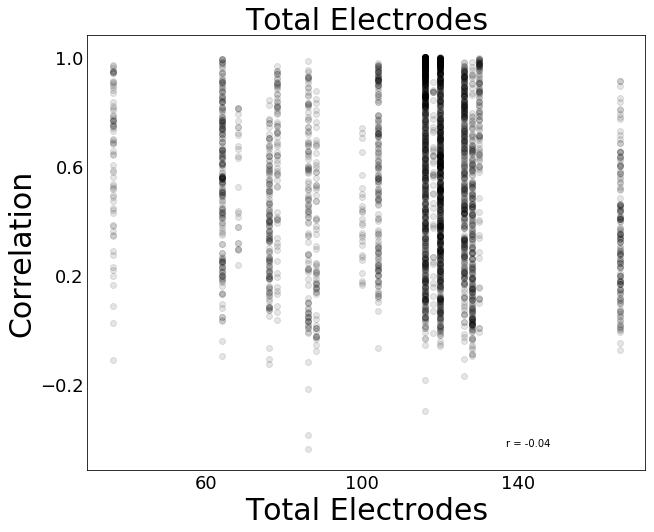

In [39]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_column(RAM_df, 'Total Electrodes', 'W_a_w', title='Total Electrodes', outfile=outfile)

(-0.0849854806807279, 1.7237825189884045e-06)


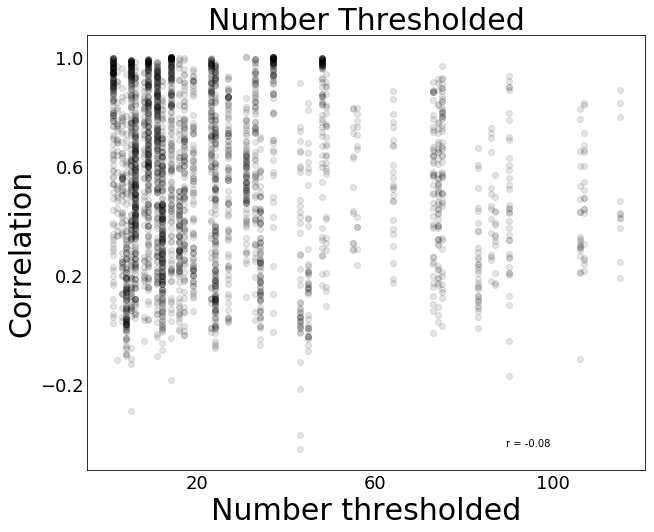

In [40]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_column(RAM_df,'Number thresholded', 'W_a_w', title='Number Thresholded', outfile=outfile)

In [41]:
grouped_results_ram = RAM_df.groupby('Subject')['W_w_w', 'W_w_a', 'W_w_all', 'W_a_w', 'W_a_a','W_a_all', 'Sample rate', 'Samples', 
                                                  'Sessions', 'Number thresholded', 'Total Time (hrs)', 'Average Session Length (hrs)', 
                                                  'Total Electrodes', 'Proportion Thresholded'].mean()

grouped_results_ram.head()

,W_w_w,W_w_a,W_w_all,W_a_w,W_a_a,W_a_all,Sample rate,Samples,Sessions,Number thresholded,Total Time (hrs),Average Session Length (hrs),Total Electrodes,Proportion Thresholded
Subject,,,,,,,,,,,,,,
R1032D_RAM_CatFR1,0.224796,0.192176,0.177856,0.669916,0.322746,0.669539,250.0,945000,2.0,24,1.050,0.525,104,0.231
R1032D_RAM_FR1,0.187975,0.187306,0.179727,0.497704,0.217964,0.523803,250.0,668750,1.0,19,0.743,0.743,104,0.183
R1061T_RAM_CatFR1,0.115714,0.017832,0.047194,0.565943,0.166754,0.462487,250.0,773040,1.0,9,0.859,0.859,120,0.075
R1061T_RAM_FR1,0.049456,0.082183,0.102014,0.245452,0.496176,0.360627,250.0,2807340,4.0,24,3.119,0.780,120,0.200
R1075J_RAM_CatFR1,-0.061593,0.503227,0.166904,0.830124,0.561983,0.692332,250.0,787250,1.0,1,0.875,0.875,120,0.008


mean: 1.881


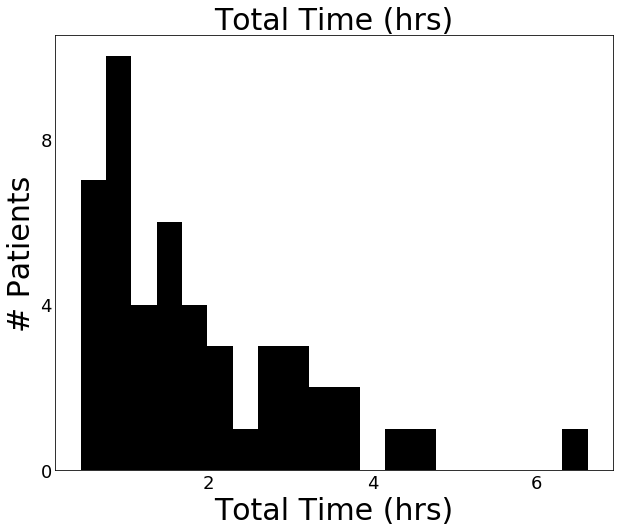

In [42]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_ram, 'Total Time (hrs)', title=None, outfile=outfile)

mean: 2.083


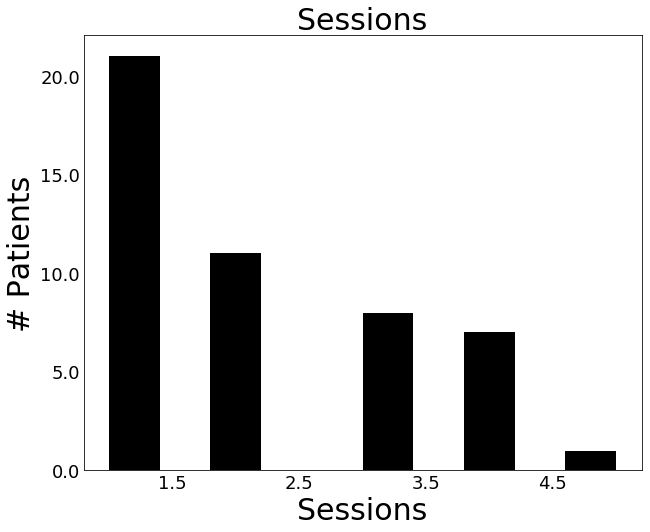

In [43]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_ram, 'Sessions', bins=10, title=None, outfile=outfile)

mean: 0.908


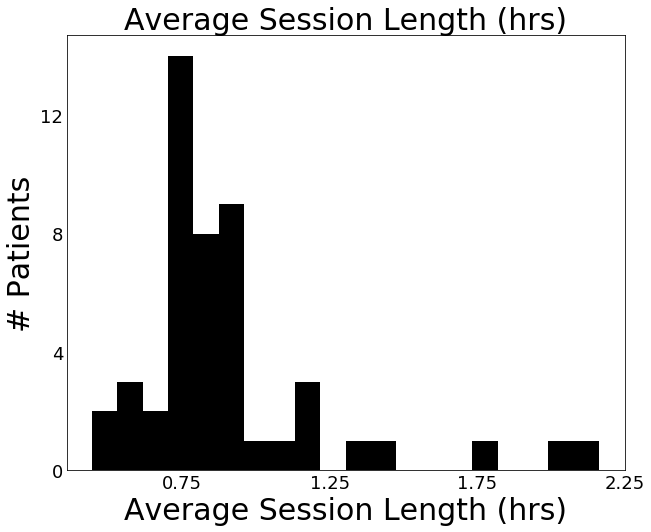

In [44]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_ram, 'Average Session Length (hrs)', title=None, outfile=outfile)

mean: 0.346


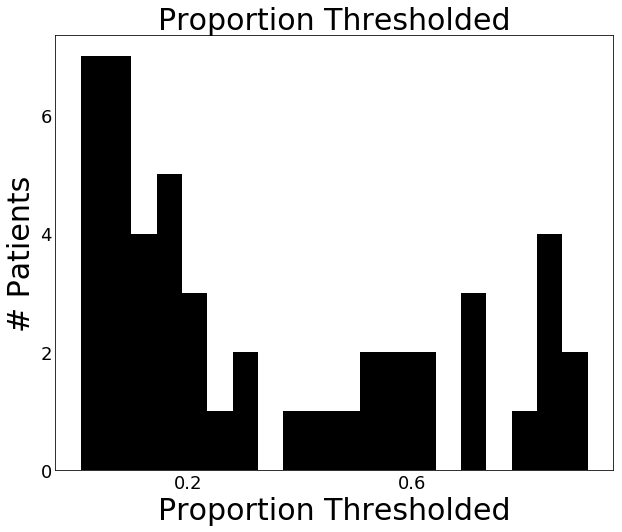

In [45]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_ram, 'Proportion Thresholded',title=None, outfile=outfile)

mean: 103.625


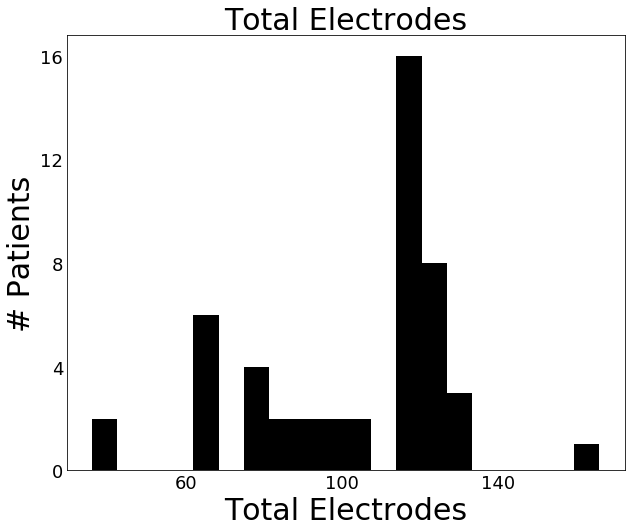

In [46]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_ram, 'Total Electrodes', title=None, outfile=outfile)

mean: 35.792


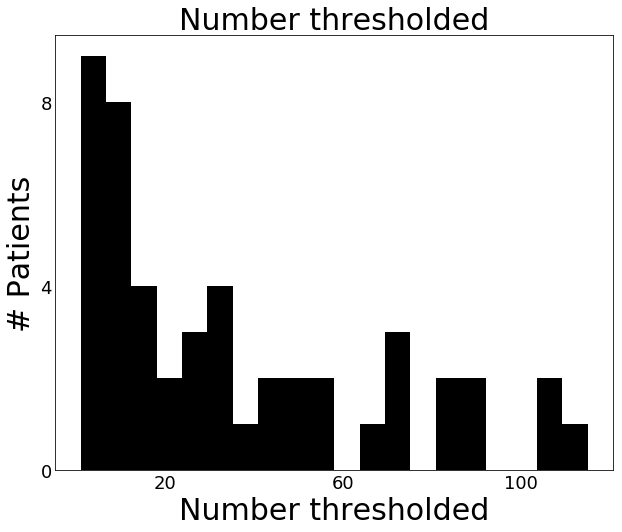

In [47]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_ram, 'Number thresholded', title=None, outfile=outfile)

## FR


In [48]:
str_find = '_FR1'
str_find
FR_df = RAM_df[RAM_df['Subject'].str.contains(str_find)]

In [49]:
grouped_results_fr = FR_df.groupby('Subject')['W_w_w', 'W_w_a', 'W_w_all', 'W_a_w', 'W_a_a','W_a_all', 'Sample rate', 'Samples', 
                                                  'Sessions', 'Number thresholded', 'Total Time (hrs)', 'Average Session Length (hrs)', 
                                                  'Total Electrodes', 'Proportion Thresholded'].mean()

grouped_results_fr.head()

,W_w_w,W_w_a,W_w_all,W_a_w,W_a_a,W_a_all,Sample rate,Samples,Sessions,Number thresholded,Total Time (hrs),Average Session Length (hrs),Total Electrodes,Proportion Thresholded
Subject,,,,,,,,,,,,,,
R1032D_RAM_FR1,0.187975,0.187306,0.179727,0.497704,0.217964,0.523803,250.0,668750,1.0,19,0.743,0.743,104,0.183
R1061T_RAM_FR1,0.049456,0.082183,0.102014,0.245452,0.496176,0.360627,250.0,2807340,4.0,24,3.119,0.780,120,0.200
R1075J_RAM_FR1,0.279704,0.038074,0.091884,0.560476,0.088325,0.282097,250.0,1410000,2.0,31,1.567,0.784,120,0.258
R1083J_RAM_FR1,0.138513,0.166480,0.148491,0.219197,0.383467,0.513954,250.0,5959750,5.0,43,6.622,1.324,86,0.500
R1092J_RAM_FR1,0.389251,0.198214,0.100740,0.830130,0.346655,0.623899,250.0,2011725,3.0,48,2.235,0.745,120,0.400


mean: 2.297


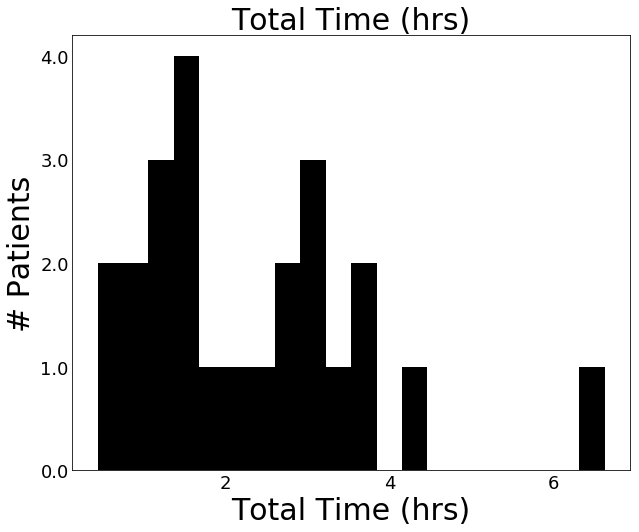

In [50]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_fr, 'Total Time (hrs)', title=None, outfile=outfile)

mean: 2.5


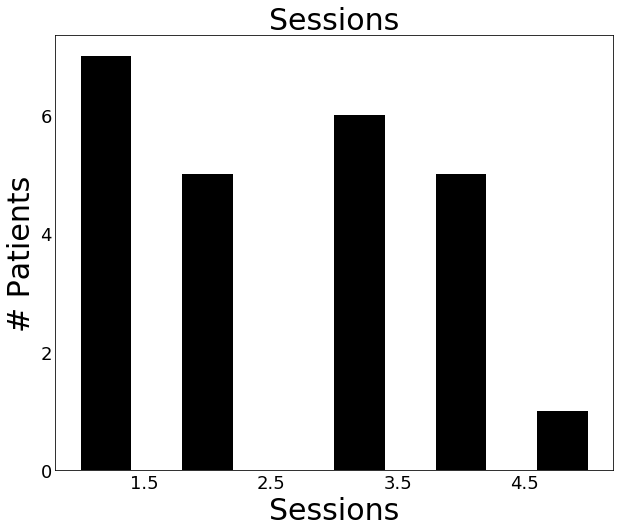

In [51]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_fr, 'Sessions', bins=10, title=None, outfile=outfile)

mean: 0.931


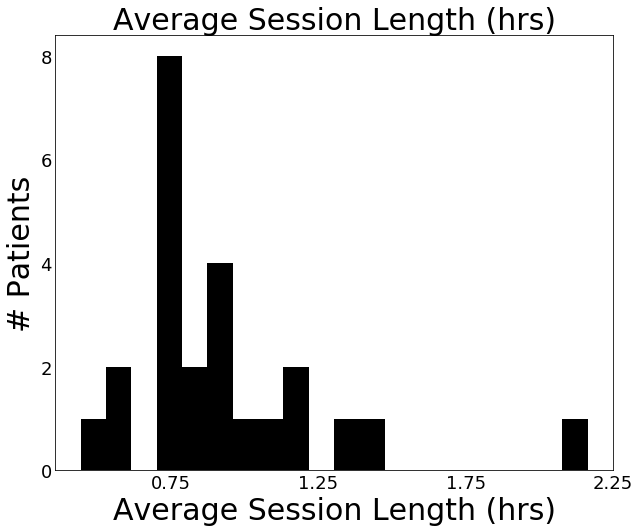

In [52]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_fr, 'Average Session Length (hrs)', title=None, outfile=outfile)

mean: 0.375


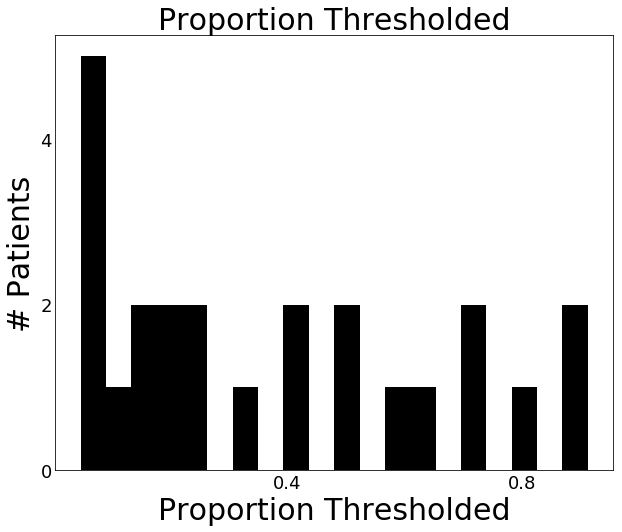

In [53]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_fr, 'Proportion Thresholded',title=None, outfile=outfile)

mean: 102.417


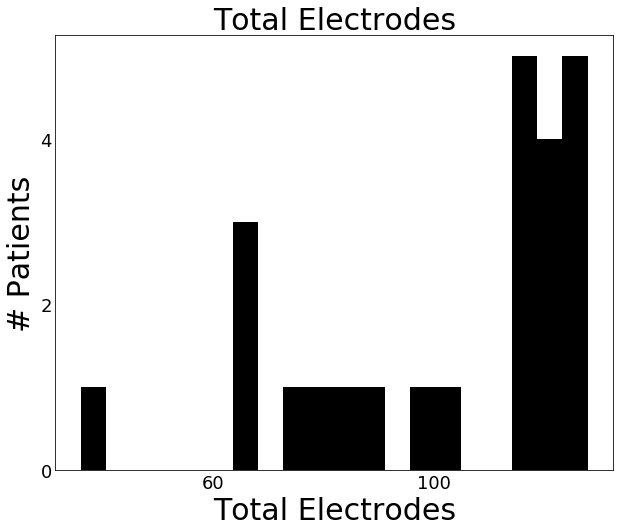

In [54]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_fr, 'Total Electrodes', title=None, outfile=outfile)

mean: 39.708


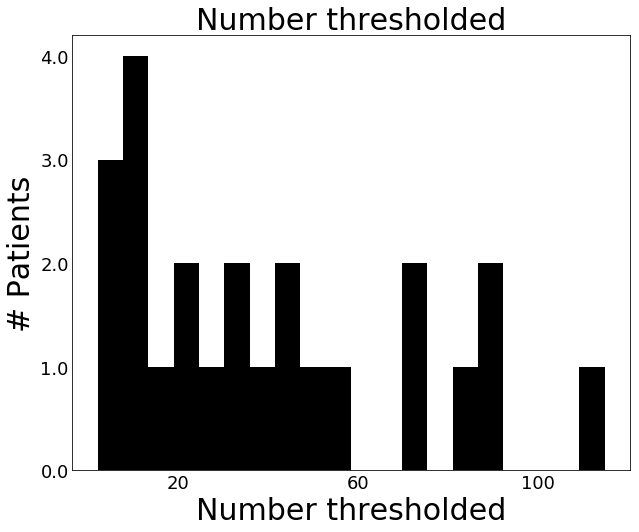

In [55]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_fr, 'Number thresholded', title=None, outfile=outfile)

## CatFR

In [56]:
str_find = '_CatFR1'
str_find
CatFR_df = RAM_df[RAM_df['Subject'].str.contains(str_find)]

In [57]:
grouped_results_catfr = CatFR_df.groupby('Subject')['W_w_w', 'W_w_a', 'W_w_all', 'W_a_w', 'W_a_a','W_a_all', 'Sample rate', 'Samples', 
                                                  'Sessions', 'Number thresholded', 'Total Time (hrs)', 'Average Session Length (hrs)', 
                                                  'Total Electrodes', 'Proportion Thresholded'].mean()
grouped_results_catfr.head()

,W_w_w,W_w_a,W_w_all,W_a_w,W_a_a,W_a_all,Sample rate,Samples,Sessions,Number thresholded,Total Time (hrs),Average Session Length (hrs),Total Electrodes,Proportion Thresholded
Subject,,,,,,,,,,,,,,
R1032D_RAM_CatFR1,0.224796,0.192176,0.177856,0.669916,0.322746,0.669539,250.0,945000,2.0,24,1.050,0.525,104,0.231
R1061T_RAM_CatFR1,0.115714,0.017832,0.047194,0.565943,0.166754,0.462487,250.0,773040,1.0,9,0.859,0.859,120,0.075
R1075J_RAM_CatFR1,-0.061593,0.503227,0.166904,0.830124,0.561983,0.692332,250.0,787250,1.0,1,0.875,0.875,120,0.008
R1083J_RAM_CatFR1,0.059358,0.113624,0.129599,0.595307,0.273222,0.443625,250.0,588250,1.0,14,0.654,0.654,86,0.163
R1092J_RAM_CatFR1,0.357527,0.283534,0.157415,0.738007,0.330996,0.555433,250.0,1800000,1.0,23,2.000,2.000,130,0.177


mean: 1.465


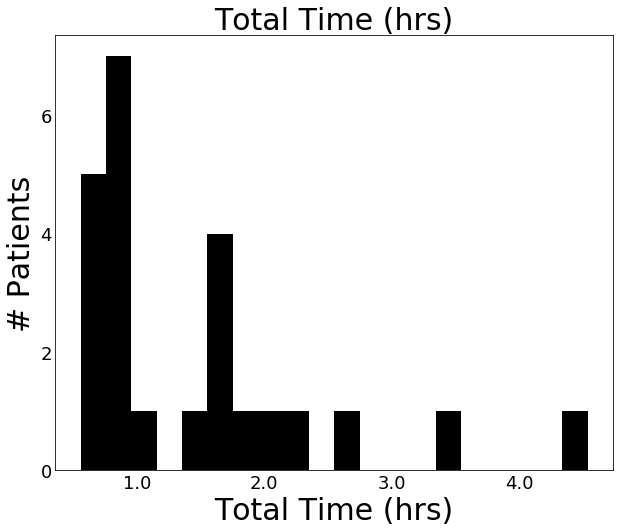

In [58]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_catfr, 'Total Time (hrs)', title=None, outfile=outfile)

mean: 1.667


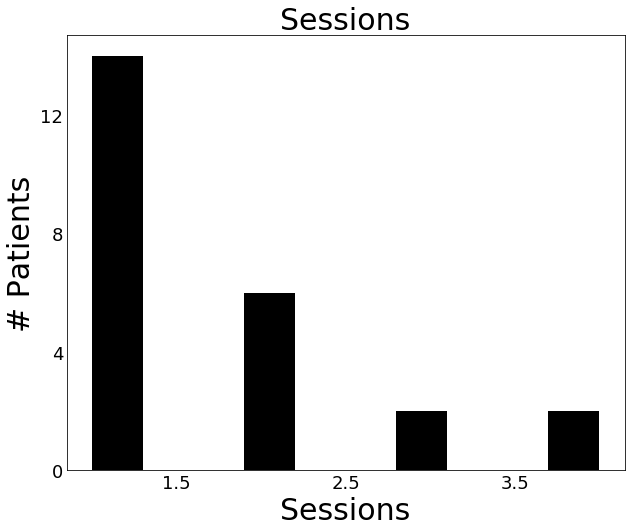

In [59]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_catfr, 'Sessions', bins=10, title=None, outfile=outfile)

mean: 0.886


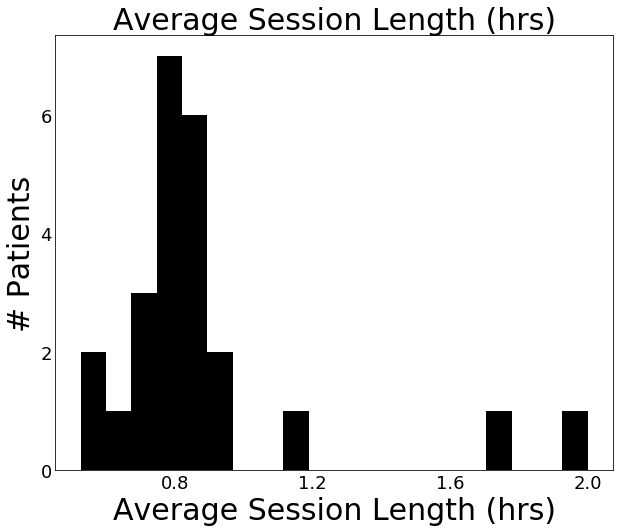

In [60]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_catfr, 'Average Session Length (hrs)', title=None, outfile=outfile)

mean: 0.316


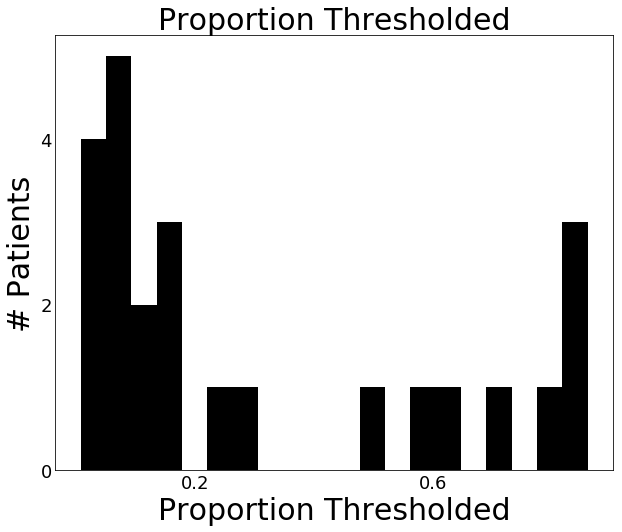

In [61]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_catfr, 'Proportion Thresholded',title=None, outfile=outfile)

mean: 104.833


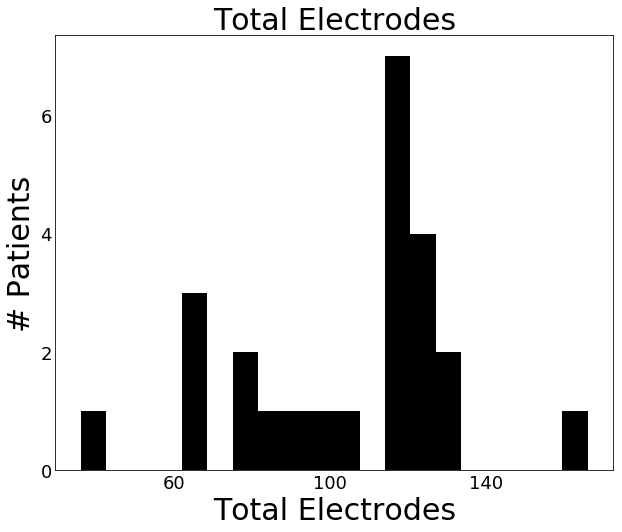

In [62]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_catfr, 'Total Electrodes', title=None, outfile=outfile)

mean: 31.875


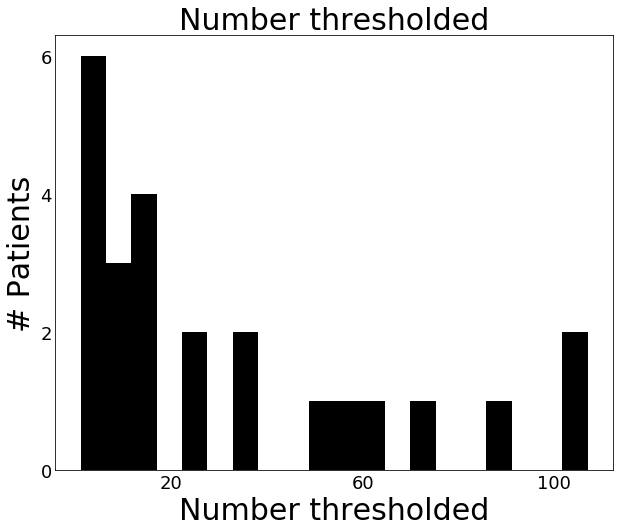

In [63]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_hist_by_patient(grouped_results_catfr, 'Number thresholded', title=None, outfile=outfile)